In [9]:
!pip install prophet

Import Libraries

In [10]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

Read DataSet

In [11]:
df = pd.read_csv('/content/salesforecast.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1127 non-null   object 
 1   Sum of Sales  1127 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.7+ KB


In [13]:
df.head()

,Date,Sum of Sales
0,1-Jan-15,32806.09
1,2-Jan-15,29818.21
2,3-Jan-15,36348.71
3,4-Jan-15,35738.97
4,5-Jan-15,31067.91


# Change Column Names for FB Prophet

In [14]:
df.columns = ['ds','y']

In [15]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-15-df3eb660f625>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
1122,2018-01-27,14675.76
1123,2018-01-28,14891.58
1124,2018-01-29,14675.76
1125,2018-01-30,14891.58
1126,2018-01-31,14407.34


# Plot Your Data

<Axes: xlabel='ds'>

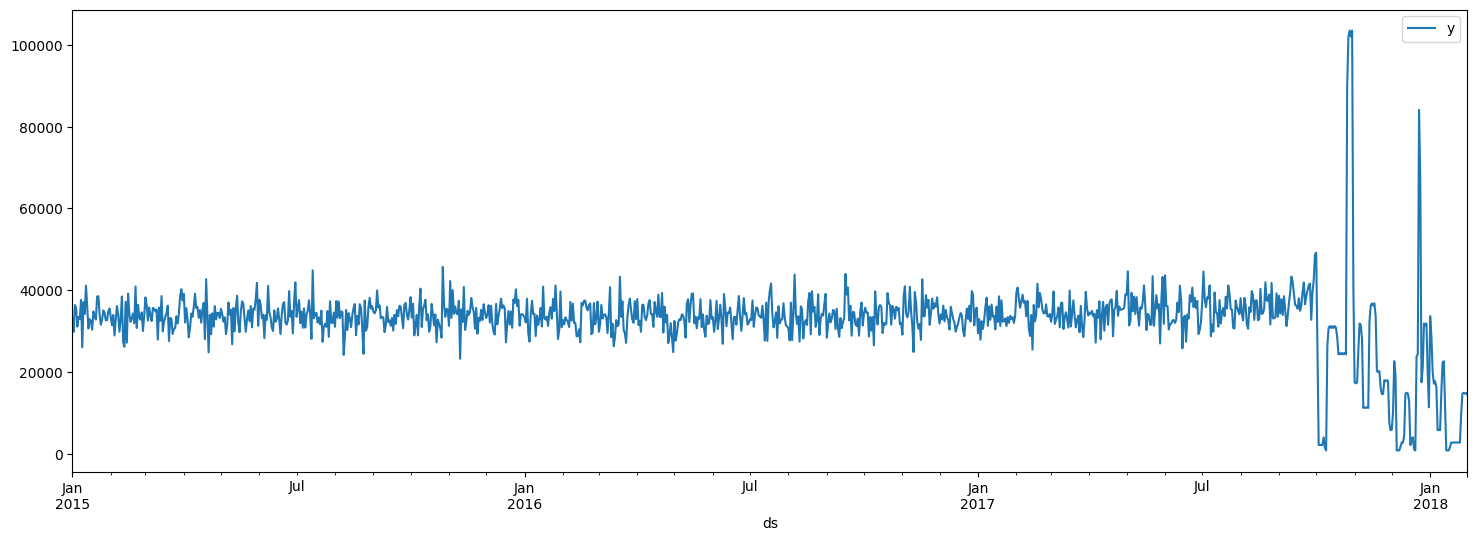

In [16]:
df.plot(x='ds',y='y',figsize=(18,6))

In [18]:
len(df)

1127

# Train, Test Split

In [19]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

# Start Making Predictions

In [47]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kgpy_e7/qkip96g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kgpy_e7/wsbt9hvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76424', 'data', 'file=/tmp/tmp4kgpy_e7/qkip96g9.json', 'init=/tmp/tmp4kgpy_e7/wsbt9hvo.json', 'output', 'file=/tmp/tmp4kgpy_e7/prophet_modeleplthea7/prophet_model-20241205082729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1122,2018-01-27,33313.820814,29116.168224,37286.743504,33312.975773,33314.708932,149.537001,149.537001,149.537001,364.716849,364.716849,364.716849,-215.179848,-215.179848,-215.179848,0.0,0.0,0.0,33463.357815
1123,2018-01-28,33313.316251,28924.056451,37106.815427,33312.466817,33314.206129,-195.293834,-195.293834,-195.293834,123.594933,123.594933,123.594933,-318.888767,-318.888767,-318.888767,0.0,0.0,0.0,33118.022417
1124,2018-01-29,33312.811688,28636.329466,36870.449902,33311.957861,33313.703542,-338.952681,-338.952681,-338.952681,83.615539,83.615539,83.615539,-422.568220,-422.568220,-422.568220,0.0,0.0,0.0,32973.859007
1125,2018-01-30,33312.307125,28498.487150,36559.889099,33311.448905,33313.200870,-706.488285,-706.488285,-706.488285,-182.628802,-182.628802,-182.628802,-523.859483,-523.859483,-523.859483,0.0,0.0,0.0,32605.818841
1126,2018-01-31,33311.802562,28198.624834,36332.935361,33310.939950,33312.698735,-1081.219869,-1081.219869,-1081.219869,-460.820528,-460.820528,-460.820528,-620.399340,-620.399340,-620.399340,0.0,0.0,0.0,32230.582694


In [49]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1122,2018-01-27,33463.357815,29116.168224,37286.743504
1123,2018-01-28,33118.022417,28924.056451,37106.815427
1124,2018-01-29,32973.859007,28636.329466,36870.449902
1125,2018-01-30,32605.818841,28498.487150,36559.889099
1126,2018-01-31,32230.582694,28198.624834,36332.935361


In [50]:
test.tail()

,ds,y
1122,2018-01-27,14675.76
1123,2018-01-28,14891.58
1124,2018-01-29,14675.76
1125,2018-01-30,14891.58
1126,2018-01-31,14407.34


# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [51]:
plot_plotly(m ,forecast)

In [52]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Evaluate Your Model

In [53]:
from statsmodels.tools.eval_measures import rmse

In [54]:
predictions = forecast.iloc[-365:]['yhat']

In [55]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  14844.127740014144
Mean Value of Test Dataset: 30439.419287671237


In [57]:
# Fit the Prophet model
from prophet import Prophet
import pandas as pd

# Assuming 'df' is your training data with columns 'ds' (date) and 'y' (sales)
model = Prophet()
model.fit(df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Forecasting 1 year
forecast = model.predict(future)

# Add a 'month' column to the forecast dataframe
forecast['month'] = forecast['ds'].dt.to_period('M')

# Sum up the sales (yhat) for each month
monthly_forecast = forecast.groupby('month')['yhat'].sum().reset_index()

# Display the monthly forecast
print(monthly_forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kgpy_e7/v8neqkat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kgpy_e7/p9o0iavs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93327', 'data', 'file=/tmp/tmp4kgpy_e7/v8neqkat.json', 'init=/tmp/tmp4kgpy_e7/p9o0iavs.json', 'output', 'file=/tmp/tmp4kgpy_e7/prophet_model61_c9xg5/prophet_model-20241205083418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      month          yhat
0   2015-01  9.984619e+05
1   2015-02  9.545457e+05
2   2015-03  1.031762e+06
3   2015-04  1.008315e+06
4   2015-05  1.040348e+06
5   2015-06  1.002057e+06
6   2015-07  1.062550e+06
7   2015-08  1.086686e+06
8   2015-09  1.094270e+06
9   2015-10  1.098521e+06
10  2015-11  1.037956e+06
11  2015-12  9.764278e+05
12  2016-01  9.714758e+05
13  2016-02  9.640299e+05
14  2016-03  1.007837e+06
15  2016-04  9.917263e+05
16  2016-05  1.023478e+06
17  2016-06  9.889836e+05
18  2016-07  1.053870e+06
19  2016-08  1.078132e+06
20  2016-09  1.091607e+06
21  2016-10  1.113774e+06
22  2016-11  1.046712e+06
23  2016-12  1.015542e+06
24  2017-01  1.013592e+06
25  2017-02  9.842668e+05
26  2017-03  1.078346e+06
27  2017-04  1.071609e+06
28  2017-05  1.112342e+06
29  2017-06  1.059512e+06
30  2017-07  1.060669e+06
31  2017-08  1.005976e+06
32  2017-09  9.460155e+05
33  2017-10  8.721324e+05
34  2017-11  7.344083e+05
35  2017-12  6.001751e+05
36  2018-01  5.085437e+05
37  2018-02 

In [58]:
pd.options.display.float_format = '{:.2f}'.format
print(monthly_forecast)


      month       yhat
0   2015-01  998461.89
1   2015-02  954545.70
2   2015-03 1031762.29
3   2015-04 1008314.89
4   2015-05 1040347.76
5   2015-06 1002056.56
6   2015-07 1062549.63
7   2015-08 1086686.10
8   2015-09 1094270.35
9   2015-10 1098520.60
10  2015-11 1037955.88
11  2015-12  976427.79
12  2016-01  971475.75
13  2016-02  964029.93
14  2016-03 1007837.45
15  2016-04  991726.31
16  2016-05 1023477.58
17  2016-06  988983.61
18  2016-07 1053870.45
19  2016-08 1078132.01
20  2016-09 1091607.46
21  2016-10 1113773.67
22  2016-11 1046711.96
23  2016-12 1015542.11
24  2017-01 1013591.96
25  2017-02  984266.77
26  2017-03 1078346.40
27  2017-04 1071609.40
28  2017-05 1112342.28
29  2017-06 1059511.91
30  2017-07 1060668.99
31  2017-08 1005975.84
32  2017-09  946015.50
33  2017-10  872132.35
34  2017-11  734408.26
35  2017-12  600175.11
36  2018-01  508543.74
37  2018-02  450994.92
38  2018-03  404180.54
39  2018-04  331238.61
40  2018-05  263512.86
41  2018-06  183597.67
42  2018-07